<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/MNIST/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Importing tensorflow package and all relevant libraries.

In [1]:
import tensorflow as tf                  #import Tensorflow library
from tensorflow import keras             #import Keras api library for tensorflow
from keras import datasets               #import datasets provided by Keras API 

import numpy as np                      
import matplotlib.pyplot as plt              

In [2]:
fashion=datasets.fashion_mnist          #instantiating Fashion dataset from MNIST under Keras

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()   #loading MNIST Fashion dataset which does train & test split internally and the default split is 0.2 i.e, 80% train & 20% test

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# checking the shape of x_train, y_train, x_test & y_test variables
print(train_images.shape)            
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
train_images[0]    #checking the data present in first row of x_train

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_labels[0]    #checking data present in first row of y_train 

9

In [7]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']  #creating a variable to hold name of the target variable values.

In [29]:
#creating a function to plot images from training dataset
def plot_sample(X,y,index):
  plt.figure(figsize = (5,2))
  plt.imshow(X[index],cmap=plt.cm.binary)   #this function is used to print image & cmap=plt.cm.binary makes the color of image to black & white
  plt.xlabel(class_names[y[index]])

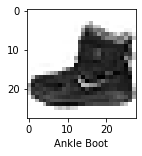

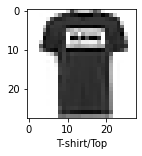

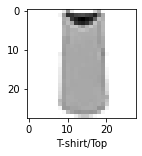

In [30]:
#printing first 3 images from the training dataset by calling the above created function
for index in range(0,3):
  plot_sample(train_images,train_labels,index)

In [10]:
#normalizing dataset i.e., the value in each and image has values from 0 to 255 which is nothing but the pixel, we'll normalize it to be between 0-1. 
#Normalizing will be done on the images from both training & testing datasets
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers package from Keras which will be used for adding Input Layers, Hidden Layers & Output Layers

### Model with Relu Activation and a single Hidden Layer

In [12]:
model = Sequential([layers.Flatten(input_shape=(28,28)),  #we mention the input shape as the number of input pixels
layers.Dense(100,activation='relu'),                      #This is Hidden Layer1 and 100 is the number of neurons to be created with activation function as 'relu'
layers.Dense(10,activation='softmax')                     #This is Output Layer with 10 neurons in the output layer and here we've to mention the number of neurons as the number of output values in target variable and activation function ='softmax' for classifiction problem
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #compiling model. Here loss is 'sparse_categorical_crossentropy' as that gets the cell value directly rather than one hot encoding which categorical_cross entropy fetches

model.summary()    #printing summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1443 - accuracy: 0.9478 - val_loss: 0.3772 - val_accuracy: 0.8857
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1366 - accuracy: 0.9508 - val_loss: 0.3754 - val_accuracy: 0.8861
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1373 - accuracy: 0.9507 - val_loss: 0.3691 - val_accuracy: 0.8897
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1337 - accuracy: 0.9523 - val_loss: 0.3792 - val_accuracy: 0.8890
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1301 - accuracy: 0.9541 - val_loss: 0.3906 - val_accuracy: 0.8845
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1295 - accuracy: 0.9539 - val_loss: 0.3768 - val_accuracy: 0.8873
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1268 - accuracy: 0.9549 - val_loss: 0.3849 - val_accuracy: 0.8853
Epoch 

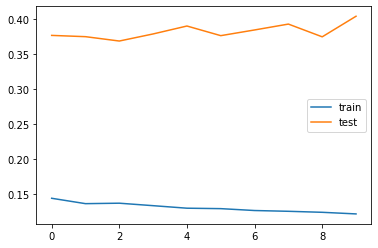

In [45]:
history = model.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels)) #Fitting model on train & test data to see accuracy & loss of model

#plot to see training & test loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 93.32% & Validation is 89.45% for 10 epochs.
* Also the Loss on Training is 0.1838 & Validation is 0.3167 for 10 epochs.
* The validation loss is not decreasing.

* Let us perform regularization on data to remove overfit.

### L2 Regularizer

In [14]:
from keras import regularizers

model_l2reg = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l2reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l2reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2493 - accuracy: 0.9219 - val_loss: 0.3700 - val_accuracy: 0.8847
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2468 - accuracy: 0.9239 - val_loss: 0.3633 - val_accuracy: 0.8869
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2449 - accuracy: 0.9241 - val_loss: 0.3900 - val_accuracy: 0.8776
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2426 - accuracy: 0.9242 - val_loss: 0.3735 - val_accuracy: 0.8835
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2387 - accuracy: 0.9267 - val_loss: 0.3746 - val_accuracy: 0.8805
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2431 - accuracy: 0.9241 - val_loss: 0.3803 - val_accuracy: 0.8822
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2360 - accuracy: 0.9273 - val_loss: 0.3651 - val_accuracy: 0.8882
Epoch 

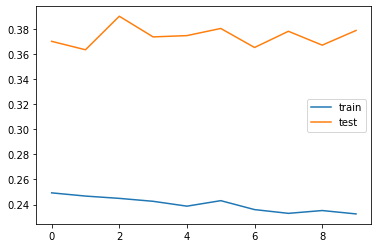

In [44]:
history_l2reg = model_l2reg.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

#plot to see training & test loss
plt.plot(history_l2reg.history['loss'],label='train')
plt.plot(history_l2reg.history['val_loss'],label='test')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 89.82% & Validation is 87.5% for 10 epochs.
* Also the Loss on Training is 0.3125 & Validation is 0.3804 for 10 epochs.
* The Validation loss is fluctuating and there is a slight decrease.

### L1 Regularizer

In [16]:
from keras import regularizers

model_l1reg = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l1reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l1reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3533 - accuracy: 0.9018 - val_loss: 0.4153 - val_accuracy: 0.8809
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3532 - accuracy: 0.9004 - val_loss: 0.4249 - val_accuracy: 0.8782
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.9011 - val_loss: 0.4102 - val_accuracy: 0.8824
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.9022 - val_loss: 0.4167 - val_accuracy: 0.8825
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.9033 - val_loss: 0.4333 - val_accuracy: 0.8746
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3502 - accuracy: 0.9015 - val_loss: 0.4235 - val_accuracy: 0.8767
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3497 - accuracy: 0.9022 - val_loss: 0.4149 - val_accuracy: 0.8822
Epoch 

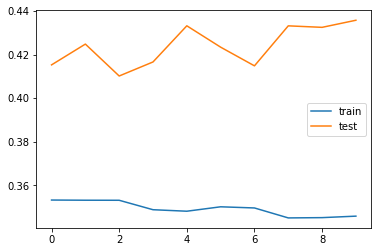

In [48]:
history_l1reg = model_l1reg.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

#plot to see training & test loss
plt.plot(history_l1reg.history['loss'], label='train')
plt.plot(history_l1reg.history['val_loss'],label='test')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 87.65% & Validation is 85.91% for 10 epochs.
* Also the Loss on Training is 0.4476 & Validation is 0.4858 for 10 epochs.
* Validation loss is fluctuating but decreased a bit when compared to previous models.

### L1 Regularizer with 2 Hidden Layers

In [18]:
from keras import regularizers

model_l1reg_2layers = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l1reg_2layers.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l1reg_2layers.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3651 - accuracy: 0.9014 - val_loss: 0.4353 - val_accuracy: 0.8812
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3579 - accuracy: 0.9044 - val_loss: 0.4268 - val_accuracy: 0.8806
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3587 - accuracy: 0.9027 - val_loss: 0.4277 - val_accuracy: 0.8799
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3598 - accuracy: 0.9033 - val_loss: 0.4223 - val_accuracy: 0.8803
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3534 - accuracy: 0.9046 - val_loss: 0.4289 - val_accuracy: 0.8800
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3554 - accuracy: 0.9031 - val_loss: 0.4282 - val_accuracy: 0.8802
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3515 - accuracy: 0.9058 - val_loss: 0.4219 - val_accuracy: 0.8829
Epoch 

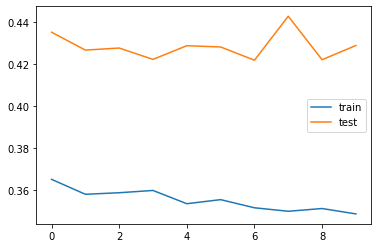

In [47]:
history_l2reg_2lay = model_l1reg_2layers.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

#plot to see training & test loss
plt.plot(history_l2reg_2lay.history['loss'], label='train')
plt.plot(history_l2reg_2lay.history['val_loss'], label='test')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 88.61% & Validation is 87.08% for 10 epochs.
* Also the Loss on Training is 0.4542 & Validation is 0.4975 for 10 epochs.
* Validation loss is fluctuating but decreased a bit when compared to previous 

### 25% Dropout with 2 Hidden Layers


* ***NOTE***: Dropouts are used to reduce overfitting i.e., it'll eliminate few neurons at each and every layer so that it doesn't train more on the train data leading to overfit.

In [20]:
from keras.layers import Dense
from keras.layers.core import Dropout

model_2layers_do = Sequential()

model_2layers_do.add(layers.Flatten(input_shape=(28,28)))
model_2layers_do.add(Dense(100,activation='relu')), Dropout(0.25)  #using dropout of 25% to eliminate neurons from HL1, so that model won't learn too much from train data
model_2layers_do.add(Dense(80,activation='relu')), Dropout(0.25)   #using dropout of 25% to eliminate neurons from HL2, so that model won't learn too much from train data
model_2layers_do.add(Dense(10,activation='softmax'))

model_2layers_do.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_do.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2550 - acc: 0.9050 - val_loss: 0.3343 - val_acc: 0.8817
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2504 - acc: 0.9071 - val_loss: 0.3489 - val_acc: 0.8767
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2431 - acc: 0.9104 - val_loss: 0.3474 - val_acc: 0.8774
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2352 - acc: 0.9122 - val_loss: 0.3255 - val_acc: 0.8852
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2322 - acc: 0.9142 - val_loss: 0.3347 - val_acc: 0.8793
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2216 - acc: 0.9182 - val_loss: 0.3318 - val_acc: 0.8872
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2152 - acc: 0.9201 - val_loss: 0.3231 - val_acc: 0.8845
Epoch 8/10
300/300 [==============================] - 1s 5ms/step - loss: 0.

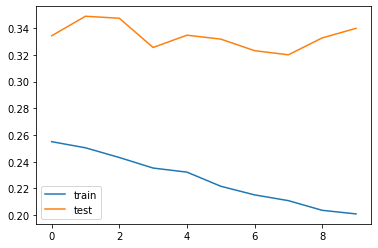

In [49]:
history_2layers_do = model_2layers_do.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

#plot to see training & test loss
plt.plot(history_2layers_do.history['loss'],label='train')
plt.plot(history_2layers_do.history['val_loss'],label='test')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 90.52% & Validation is 87.81% for 10 epochs.
* Also the Loss on Training is 0.2577 & Validation is 0.3377 for 10 epochs.
* Though the Validation loss is less when compared to other models, it has started to increase.

### Early Stopping Callback with 2 Hidden Layers


* NOTE: *We are using early stopping call back method to handle the problem from previous model i.e., validation loss increasing after a certain number of epochs.*
* *In Early Stopping, before calculating Validation Loss of the next epoch it'll compare it with previous epochs validation loss and stops a step before if that has a less Validation Loss*.
* *Sometimes it may so happen that validation loss starts decreasing from a minimum value after a certain number of epochs. This can be handled with a parameter 'patience'. It is better to give high value for patience so that it'll stop after a certain number of epochs.*

In [22]:
from keras.callbacks import EarlyStopping  #importing EarlyStopping package from Keras Callbacks

model_2layers_es = Sequential()

model_2layers_es.add(layers.Flatten(input_shape=(28,28)))
model_2layers_es.add(Dense(100,activation='relu'))
model_2layers_es.add(Dense(80,activation='relu'))
model_2layers_es.add(Dense(10,activation='softmax'))

model_2layers_es.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_es.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002 - acc: 0.9614 - val_loss: 0.5507 - val_acc: 0.8870
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1013 - acc: 0.9609 - val_loss: 0.5881 - val_acc: 0.8810
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0999 - acc: 0.9621 - val_loss: 0.5255 - val_acc: 0.8832
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0970 - acc: 0.9617 - val_loss: 0.5993 - val_acc: 0.8820
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0945 - acc: 0.9638 - val_loss: 0.5976 - val_acc: 0.8855
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0965 - acc: 0.9629 - val_loss: 0.5848 - val_acc: 0.8830
Epoch 00006: early stopping


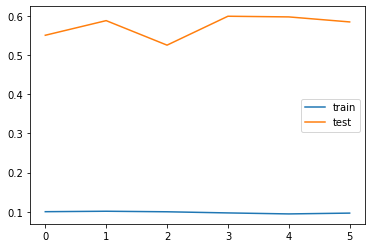

In [54]:
history_es = model_2layers_es.fit(x=train_images,y=train_labels,epochs=10,validation_data=(test_images,test_labels),callbacks=[EarlyStopping(monitor='val_loss', patience=3,mode='min',verbose=1)])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.


#plot to see training & test loss
plt.plot(history_es.history['loss'],label='train')
plt.plot(history_es.history['val_loss'],label='test')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 94.99% & Validation is 88.42% for 10 epochs.
* Also the Loss on Training is 0.1312 & Validation is 0.5255 for 10 epochs.
* Here the model has stopped at epoch 6, because the minimum val_loss is at epoch3 and it did wait for 3 more epochs (patience=3) to see if the val_loss is decreasing further.

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - acc: 0.9646 - val_loss: 0.5571 - val_acc: 0.8862
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0910 - acc: 0.9656 - val_loss: 0.6181 - val_acc: 0.8899
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0908 - acc: 0.9660 - val_loss: 0.6422 - val_acc: 0.8872
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - acc: 0.9661 - val_loss: 0.6344 - val_acc: 0.8867
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - acc: 0.9665 - val_loss: 0.6050 - val_acc: 0.8908
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - acc: 0.9672 - val_loss: 0.6018 - val_acc: 0.8868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - acc: 0.9667 - val_loss: 0.6083 - val_acc: 0.8859
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

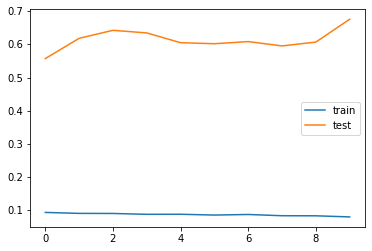

In [55]:
history_es = model_2layers_es.fit(x=train_images,y=train_labels,epochs=10,validation_data=(test_images,test_labels),callbacks=[EarlyStopping(monitor='val_loss', patience=200,mode='min',verbose=1)])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.


#plot to see training & test loss
plt.plot(history_es.history['loss'],label='train')
plt.plot(history_es.history['val_loss'],label='test')
plt.legend()
plt.show()

* As we gave a high patience value of 300 the model did not stop even after it the validation loss started to increase.

### Early Stopping & Model Check Point callbacks with 2 Hidden Layers

* NOTE: *In the previous model it did not stop even when val_loss is less at a specific point as the patience is high and if we give a less patience value then it'll miss the epoch where the val_loss may further decrease after the patience. To encounter this problem we'll be using ModelCheckPoint, where we store the minimum val_loss in a variable and will overwrite it with the next min val_loss only.*

In [70]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint   #importing ModelCheckPoint library from keras.callback

model_2layers_es_cp = Sequential()

model_2layers_es_cp.add(layers.Flatten(input_shape=(28,28)))
model_2layers_es_cp.add(Dense(100,activation='relu'))
model_2layers_es_cp.add(Dense(80,activation='relu'))
model_2layers_es_cp.add(Dense(10,activation='softmax'))

model_2layers_es_cp.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_es_cp.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


* NOTE: *Advantage of using 2 Callbacks is one can take care of loss (ES in our case) and one can take care of accuracy (CP in our case)*

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0414 - acc: 0.6730 - val_loss: 0.5531 - val_acc: 0.8066

Epoch 00001: val_acc improved from -inf to 0.80660, saving model to best_model.h5
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5144 - acc: 0.8207 - val_loss: 0.4935 - val_acc: 0.8260

Epoch 00002: val_acc improved from 0.80660 to 0.82600, saving model to best_model.h5
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4637 - acc: 0.8377 - val_loss: 0.4664 - val_acc: 0.8347

Epoch 00003: val_acc improved from 0.82600 to 0.83470, saving model to best_model.h5
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4335 - acc: 0.8478 - val_loss: 0.4447 - val_acc: 0.8410

Epoch 00004: val_acc improved from 0.83470 to 0.84100, saving model to best_model.h5
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4130 - acc: 0.8546 - val_loss: 0.4346 - val_a

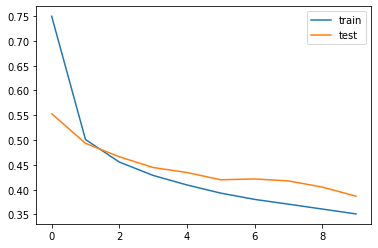

In [71]:
from keras.models import load_model

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=1)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_2layers_es_cp = model_2layers_es_cp.fit(x=train_images,y=train_labels,epochs=10,validation_data=(test_images,test_labels),callbacks=[es,cp])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model = load_model('best_model.h5')

_, train_acc = saved_model.evaluate(train_images,train_labels,verbose=0)
_, test_acc = saved_model.evaluate(test_images,test_labels,verbose=0)

print('Train: %3f, Test: %3f' % (train_acc,test_acc))
print('\n')
#plot to see training & test loss
plt.plot(history_2layers_es_cp.history['loss'],label='train')
plt.plot(history_2layers_es_cp.history['val_loss'],label='test')
plt.legend()
plt.show()

* The best model has an accuracy of 87.17% & 85.39% on Training & Test data respectively with Stocastic Gradient Descent optimizer.
* The loss on Test has come down.

### Predicting the target values

In [64]:
predictions_es_cp = model_2layers_es_cp.predict(test_images) #predicting value using the Early Stopping model.

Predicted Value of 0 image from Test Data is: 9
Actual value of 0 image is: 9


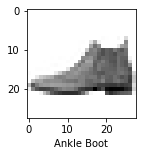

In [66]:
predictions_es_cp[0] # this gives the one hot encoding value of the target variable for the provided index.
print("Predicted Value of {} image from Test Data is: {}".format(0,np.argmax(predictions_es_cp[0]))) #this gives the value of prediction.
print("Actual value of {} image is: {}".format(0,test_labels[0])) #this gives the actual value

plot_sample(test_images,test_labels,0)   #calling function created above to print the image. Here image is from our prediction & Label on x-axis is actual value.

* ***NOTE***: For now, I'm using validation data as Test data.

### Conclusion

* This shows that actual & predicted value for a particular index '0' are same and our prediction is correct.

* We can repeat this process by choosing a model where the validation accuracy is less.